In [1]:
from model.VQGAN.vqgan import VQModel 

# checkpoint = '/mnt/disk3/tiennh/taming-transformers/logs/2023-09-14T22-05-12_custom_vqgan/checkpoints/last.ckpt' 

/mnt/disk1/mbbank/miniconda3/envs/taming/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
import yaml
import argparse 
import omegaconf.dictconfig

f = open('/mnt/disk1/mbbank/tien/BBDM_folk/configs/test_vqgan.yaml', 'r')
dict_config = yaml.load(f, Loader=yaml.FullLoader)

def dict2namespace(config):
    namespace = argparse.Namespace()
    for key, value in config.items():
        if isinstance(value, dict) or isinstance(value, omegaconf.dictconfig.DictConfig):
            new_value = dict2namespace(value)
        else:
            new_value = value
        setattr(namespace, key, new_value)
    return namespace

nconfig = dict2namespace(dict_config)
vq = VQModel(**vars(nconfig.model.VQGAN.params))

import torch 
import numpy as np  

x_np = np.load('/mnt/disk3/tiennh/data4vq/test/ct1001.npy', allow_pickle=True)
x = torch.from_numpy(x_np)
x = x.unsqueeze(0)
dec, diff, _ = vq.encode(x)
dec.shape, diff.shape


Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
Restored from /mnt/disk3/tiennh/taming-transformers/logs/2023-09-18T20-41-26_custom_v4/checkpoints/last.ckpt


(torch.Size([1, 1, 64, 64]), torch.Size([]))

In [10]:
nconfig.model.VQGAN.params.lossconfig

Namespace(target='torch.nn.Identity')

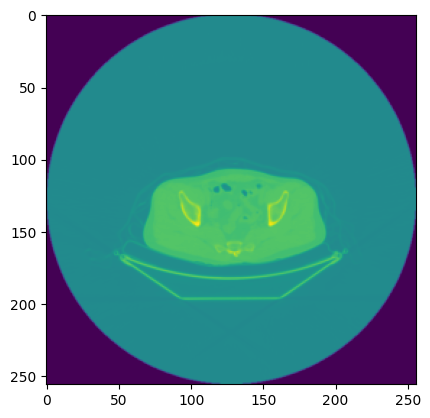

In [11]:

import matplotlib.pyplot as plt 
plt.imshow(x_np[0])

In [12]:
dec.shape

torch.Size([1, 1, 64, 64])

In [13]:
dec_np = dec.detach().numpy()
dec_np.shape

(1, 1, 64, 64)

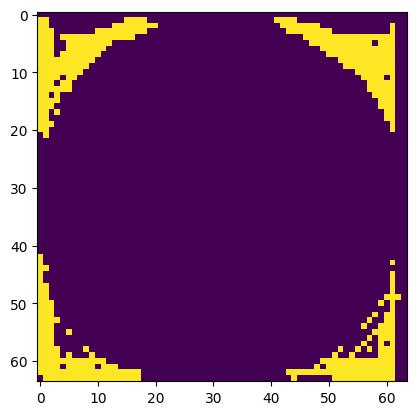

In [14]:
plt.imshow(dec_np[0][0])   